In [49]:
import mnist_util as mu
import numpy as np


# importing training images and test images
X_train, Y_train, X_test, Y_test = mu.get_np_array()




In [50]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', Y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', Y_test.shape)


Training data shape:  (60000, 784)
Training labels shape:  (60000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


In [51]:
num_training = 10000
mask = list(range(num_training))
X_train = X_train[mask]
Y_train = Y_train[mask]

num_test = 2000
mask = list(range(num_test))
X_test = X_test[mask]
Y_test = Y_test[mask]

In [52]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(10000, 784) (2000, 784)


In [53]:

from classifier.k_nearest_neighbor import KNearestNeighbor
classifier = KNearestNeighbor()
classifier.train(X_train, Y_train)

In [54]:
dists = classifier.compute_distances_no_loops(X_test)
print(dists.shape)

(2000, 10000)


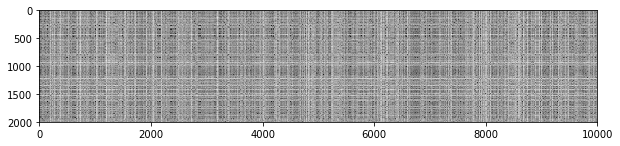

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.imshow(dists, interpolation='none')
plt.show()


In [56]:
Y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(Y_test_pred == Y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 1845 / 2000 correct => accuracy: 0.922500


(155, 784)


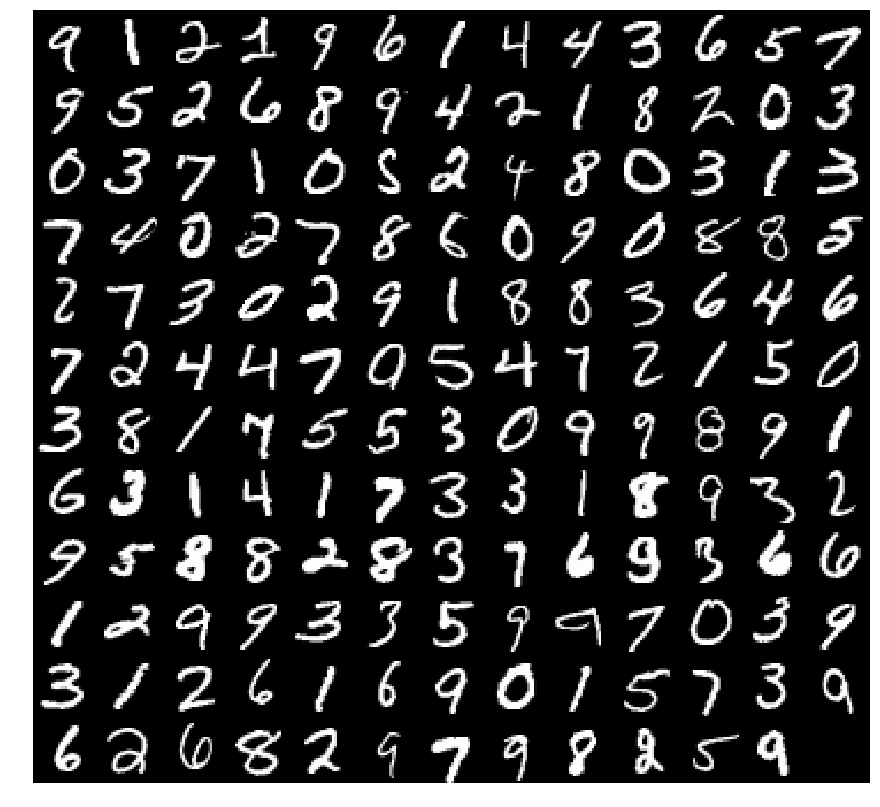

In [58]:
#print images predicted wrong
nums=[]
for i in range(Y_test.size):
        if(Y_test[i]!=Y_test_pred[i]):
            nums.append(X_train[i])
print(np.array(nums).shape)
mu.show_nums(np.array(nums))

In [63]:
k_choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 50, 100,200,500,1000]
for k in k_choices:
    Y_test_pred = classifier.predict_labels(dists, k=k)
    num_correct = np.sum(Y_test_pred == Y_test)
    accuracy = float(num_correct) / num_test
    print('for %d Got %d / %d correct => accuracy: %f' % (k,num_correct, num_test, accuracy))

for 1 Got 1845 / 2000 correct => accuracy: 0.922500
for 2 Got 1812 / 2000 correct => accuracy: 0.906000
for 3 Got 1847 / 2000 correct => accuracy: 0.923500
for 4 Got 1845 / 2000 correct => accuracy: 0.922500
for 5 Got 1841 / 2000 correct => accuracy: 0.920500
for 6 Got 1840 / 2000 correct => accuracy: 0.920000
for 7 Got 1838 / 2000 correct => accuracy: 0.919000
for 8 Got 1840 / 2000 correct => accuracy: 0.920000
for 9 Got 1832 / 2000 correct => accuracy: 0.916000
for 10 Got 1836 / 2000 correct => accuracy: 0.918000
for 12 Got 1829 / 2000 correct => accuracy: 0.914500
for 15 Got 1811 / 2000 correct => accuracy: 0.905500
for 20 Got 1809 / 2000 correct => accuracy: 0.904500
for 50 Got 1750 / 2000 correct => accuracy: 0.875000
for 100 Got 1707 / 2000 correct => accuracy: 0.853500
for 200 Got 1626 / 2000 correct => accuracy: 0.813000
for 500 Got 1449 / 2000 correct => accuracy: 0.724500
for 1000 Got 1279 / 2000 correct => accuracy: 0.639500
